In [21]:
import pandas as pd
import numpy as np

data=pd.read_excel('C:\\Users\\Ramki\\Downloads/Churn_Modelling.xlsx')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [40]:
for col in data.columns:
    print( col,': ', data[col].nunique(),'and % of uniqueness: ', data[col].nunique()*100/len(data))

RowNumber :  10000 and % of uniqueness:  100.0
CustomerId :  10000 and % of uniqueness:  100.0
Surname :  2932 and % of uniqueness:  29.32
CreditScore :  460 and % of uniqueness:  4.6
Geography :  3 and % of uniqueness:  0.03
Gender :  2 and % of uniqueness:  0.02
Age :  70 and % of uniqueness:  0.7
Tenure :  11 and % of uniqueness:  0.11
Balance :  6382 and % of uniqueness:  63.82
NumOfProducts :  4 and % of uniqueness:  0.04
HasCrCard :  2 and % of uniqueness:  0.02
IsActiveMember :  2 and % of uniqueness:  0.02
EstimatedSalary :  9999 and % of uniqueness:  99.99
Exited :  2 and % of uniqueness:  0.02


In [41]:
#let's drop unwanted columns

data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [42]:
cat_cols= data.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print (f" col name : {col}, N Unique : {data[col].nunique()}")

 col name : Geography, N Unique : 3
 col name : Gender, N Unique : 2


In [43]:
for col in cat_cols:
    data[col]=data[col].astype('category')
    data[col]=data[col].cat.codes
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [44]:
X=data.drop('Exited', axis=1)
y=data['Exited'].values.astype(np.uint8)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=4)

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

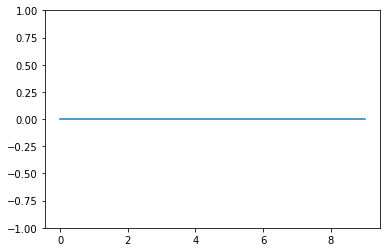

In [52]:
plt.ylim(-1,1)
means=[]
for i in range(X.shape[1]):
    means.append(np.mean(X_train[:,i]))
plt.plot(means, scaley=False)

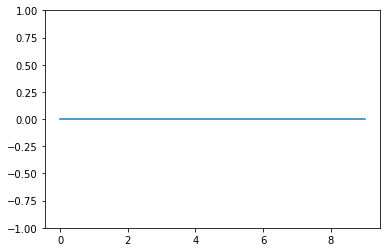

In [59]:
plt.ylim(-1,1)
means=[]
for i in range(X.shape[1]):
    means.append(np.mean(X_test[:,i]))
plt.plot(means, scaley=False)

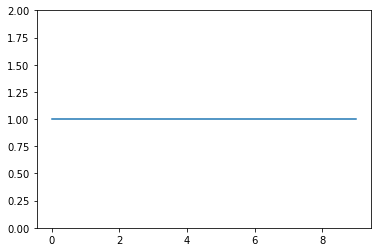

In [61]:
plt.ylim(0,2)
var=[]
for i in range(X.shape[1]):
    var.append(np.var(X_train[:,i]))
plt.plot(means, scaley=False)

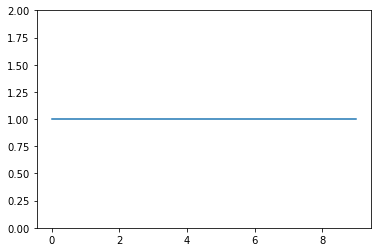

In [62]:
plt.ylim(0,2)
var=[]
for i in range(X.shape[1]):
    var.append(np.var(X_test[:,i]))
plt.plot(means, scaley=False)

After scaling both train set and test set looking good, there is not fluctuations in mean and variance of both train and test

In [72]:
from sklearn.neighbors import KNeighborsClassifier


for k in [1,3,5,6,7,9,11,13,15]:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    print(f'K value is ',k,'and the score is',model.score(X_test, y_test))

K value is  1 and the score is 0.8036
K value is  3 and the score is 0.8324
K value is  5 and the score is 0.8456
K value is  6 and the score is 0.846
K value is  7 and the score is 0.8492
K value is  9 and the score is 0.8468
K value is  11 and the score is 0.8464
K value is  13 and the score is 0.8484
K value is  15 and the score is 0.8488
